In [37]:
from oldModel import OrientationWei, sensory_noise_dist, sensory_noise_dist_sample
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
plt.rcParams['lines.linewidth'] = 3
import seaborn as sns
# sns.set_context('talk')
import scipy.stats as ss
import math

from scipy.integrate import simpson, trapezoid
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d
from ipywidgets import interact
import ipywidgets as widgets
# from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde

In [38]:
import riskModelPercept as model
import WeiPerception as wei

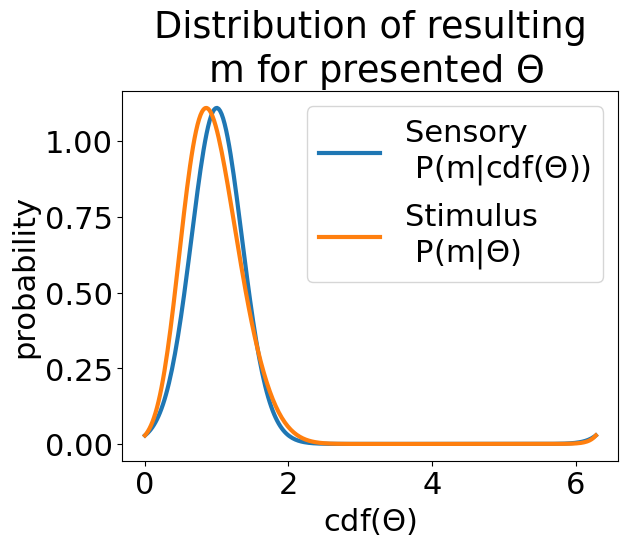

In [39]:
plt.plot(model.rep_grid,ss.vonmises(loc=1.0, kappa=8).pdf(model.rep_grid), label = "Sensory\n P(m|cdf($\Theta$))")
plt.plot(model.rep_grid,ss.vonmises(loc=1.0, kappa=8).pdf(model.cdf(model.rep_grid, model.rep_grid)), label = "Stimulus\n P(m|$\Theta$)")


plt.xlabel('cdf($\Theta$)')
plt.ylabel('probability')
plt.title('Distribution of resulting\n m for presented $\Theta$')
plt.legend()

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

In [50]:
y=wei.x
y = np.append(y,2*np.pi)

ppp1 = wei.bias(kappa = 8, kappa_s = 10000)
ppp1[0]=ppp1[0]-2*np.pi
ppp1 = np.append(ppp1,ppp1[0])

ppp2 = wei.bias(kappa = 8, kappa_s = 32)
# ppp2[0]=ppp2[0]-2*np.pi
ppp2 = np.append(ppp2,ppp2[0])
ppp3 = wei.bias(kappa = 8, kappa_s = 16)
# ppp3[0]=ppp3[0]-2*np.pi
ppp3 = np.append(ppp3,ppp3[0])
ppp4 = wei.bias(kappa = 8, kappa_s = 8)
# ppp4[0]=ppp4[0]-2*np.pi
ppp4 = np.append(ppp4,ppp4[0])
ppp5 = wei.bias(kappa = 8, kappa_s = 4)
# ppp5[0]=ppp5[0]-2*np.pi
ppp5 = np.append(ppp5,ppp5[0])

Text(0.5, 1.0, 'Wei : Bias -\n Varying stimulus noise')

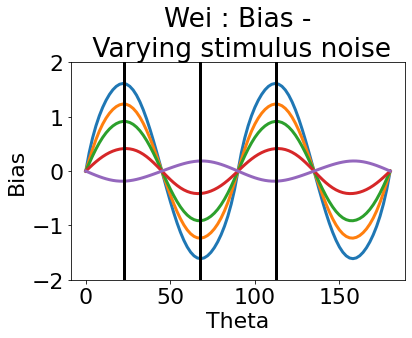

In [12]:
# ppp1
plt.plot(90*y/np.pi,90*ppp1/np.pi)
plt.ylim(-2,2)
plt.plot(90*y/np.pi,90*ppp2/np.pi)
plt.plot(90*y/np.pi,90*ppp3/np.pi)
plt.plot(90*y/np.pi,90*ppp4/np.pi)
plt.plot(90*y/np.pi,90*ppp5/np.pi)


plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')

plt.xlabel('Theta')
plt.ylabel('Bias')
plt.title('Wei : Bias -\n Varying stimulus noise')



In [39]:

y = model.stim_grid

theta0 = np.linspace(0.0, 2.*np.pi, 500) #0.8
kappa1 = 10000
kappa2 = 32
kappa3 = 16
kappa4 = 8
kappa5 = 4


normalize = False

kappa_r = 8

pp1 = model.wei_bias(theta0, kappa1, kappa_r, normalize)
pp1[0]=pp1[0]#-2*np.pi


pp2 = model.wei_bias(theta0, kappa2, kappa_r, normalize)
pp2[0]=pp2[0]-2*np.pi


pp3 = model.wei_bias(theta0, kappa3, kappa_r, normalize)
pp3[0]=pp3[0]-2*np.pi

pp4 = model.wei_bias(theta0, kappa4, kappa_r, normalize)
pp4[0]=pp4[0]#-2*np.pi

pp5 = model.wei_bias(theta0, kappa5, kappa_r, normalize)
pp5[0]=pp5[0]#-2*np.pi


Text(0, 0.5, 'bias')

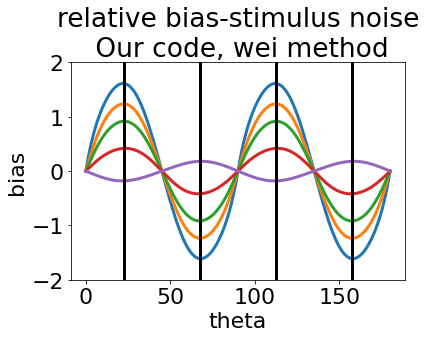

In [40]:
# ppp1
plt.plot(90*y/np.pi,90*pp1/np.pi)
plt.ylim(-2,2)
plt.plot(90*y/np.pi,90*pp2/np.pi)
plt.plot(90*y/np.pi,90*pp3/np.pi)
plt.plot(90*y/np.pi,90*pp4/np.pi)
plt.plot(90*y/np.pi,90*pp5/np.pi)


plt.title('relative bias-stimulus noise\n Our code, wei method')

plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')
plt.axvline(157.5, c='k')

plt.xlabel('theta')
plt.ylabel('bias')

Text(0, 0.5, 'Mean bias')

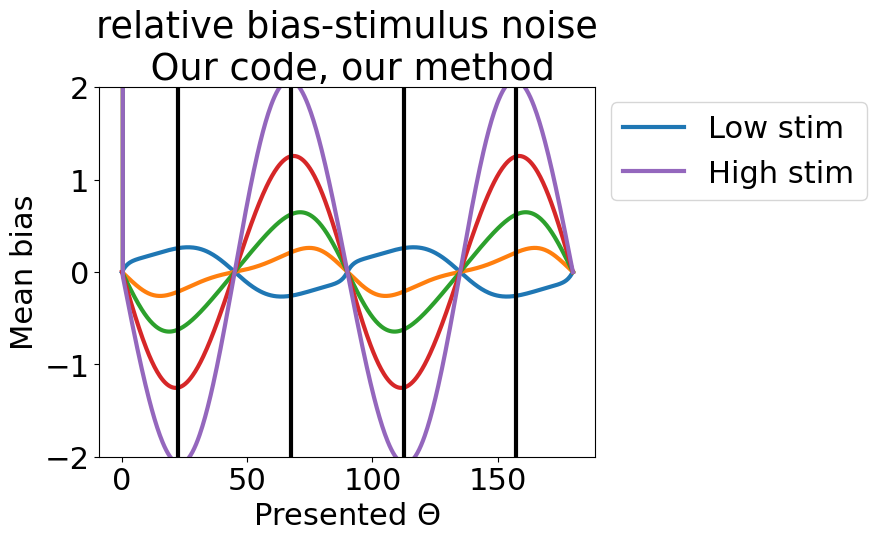

In [27]:
theta0 = np.linspace(0.00, 2.0*np.pi, 500) #0.8
# theta0 = theta0[:-1]

kappa1 = 10000
kappa2 = 32
kappa3 = 16
kappa4 = 8
kappa5 = 4

kappa =64



# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, high_rep_noise)
# plt.plot(theta0, E_theta_given_theta0 - theta0, label = "Both noises high")

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa1, kappa, normalize = False)
plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi, label = "Low stim")

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa2, kappa, normalize = False)
plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi)


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa3, kappa, normalize = False)
plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi)

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa4, kappa, normalize = False)
plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi)


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, kappa5, kappa, normalize = False)
plt.plot(theta0*90./np.pi, (E_theta_given_theta0 - theta0)*90./np.pi, label = "High stim")




plt.ylim(-2,2)

plt.axvline(22.5, c='k')
plt.axvline(67.5, c='k')
plt.axvline(112.5, c='k')
plt.axvline(157.5, c='k')


plt.legend(bbox_to_anchor=(1., 1.0))

plt.title('relative bias-stimulus noise\n Our code, our method')
plt.xlabel("Presented $\Theta$")
plt.ylabel("Mean bias")
# plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

In [79]:
high_stim_noise = 2
low_stim_noise = 1000
high_rep_noise = 2
low_rep_noise = 8

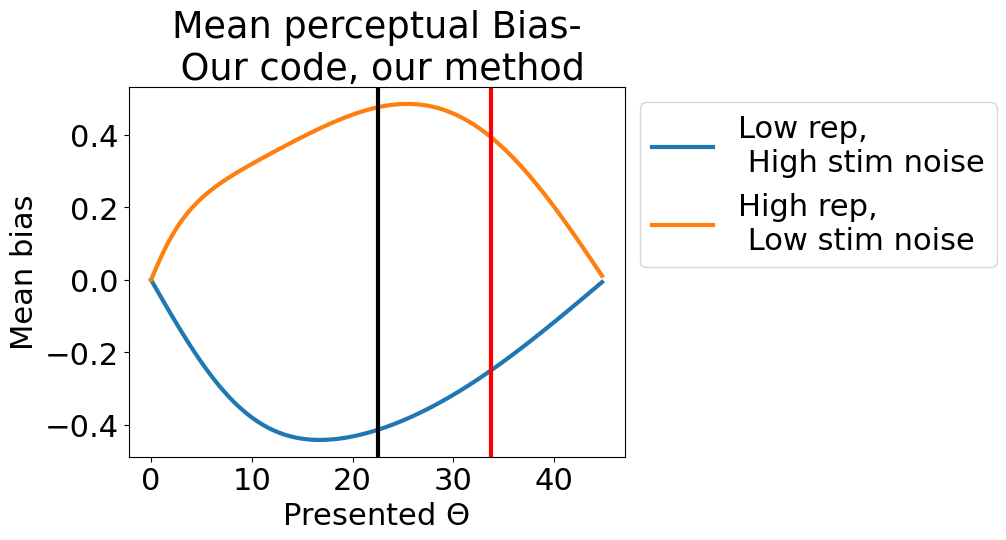

In [45]:
theta0 = np.linspace(0.00, 2.0*np.pi, 500) #0.8
# theta0 = theta0[:-1]


# E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, high_rep_noise)
# plt.plot(theta0, E_theta_given_theta0 - theta0, label = "Both noises high")

E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, high_stim_noise, low_rep_noise, normalize = False)
plt.plot(theta0[0:125]*90./np.pi, (E_theta_given_theta0 - theta0)[0:125]*90./np.pi, label = "Low rep, \n High stim noise")


E_theta_given_theta0 = model.expected_thetahat_theta0(theta0, low_stim_noise, high_rep_noise, normalize = False)
plt.plot(theta0[0:125]*90./np.pi, (E_theta_given_theta0 - theta0)[0:125]*90./np.pi, label = "High rep, \n Low stim noise")



# plt.ylim(-3,3)

plt.axvline(22.5, c='k')
# plt.axvline(11.25, c='k')
plt.axvline(33.75, c='r')

# plt.axvline(67.5, c='k')
# plt.axvline(112.5, c='k')
# plt.axvline(157.5, c='k')


plt.legend(bbox_to_anchor=(1., 1.0))

plt.title('Mean perceptual Bias-\n Our code, our method')
plt.xlabel("Presented $\Theta$")
plt.ylabel("Mean bias")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

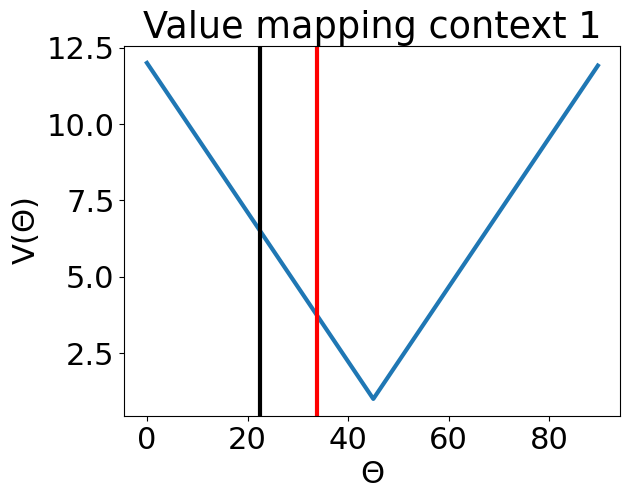

In [49]:
plt.plot(model.stim_grid[0:250]*90./np.pi,model.value_function_ori(model.stim_grid, type = "linearPrior")[0:250])

plt.axvline(22.5, c='k')
# plt.axvline(11.25, c='k')
plt.axvline(33.75, c='r')

plt.title('Value mapping context 1')
plt.xlabel("$\Theta$")
plt.ylabel("V($\Theta$)")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

In [55]:
# iF THE RISKY ATTITUDES Came directly from the mean perceptual bias from above, then we would get things from below.
# However, risk attitudes are mean of value distribution comparison and not the mapped value comparisons of mean 
# perceptual distributions. We anyways do tyhe following for exercise.

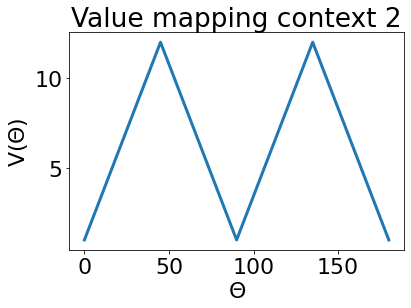

In [87]:
plt.plot(model.stim_grid*90./np.pi,model.value_function_ori(model.stim_grid, type = "inverseLinearPrior"))

plt.title('Value mapping context 2')
plt.xlabel("$\Theta$")
plt.ylabel("V($\Theta$)")
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

In [11]:
## Gifs

In [51]:
theta0List = np.linspace((0./90.)*np.pi, (45./90.)*np.pi, 23)
sigma_stim = 0.05*np.pi

i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.stim_grid*180./np.pi, np.squeeze(model.stimulus_noise(theta0, kappa_s=sigma_stim, grid=model.stim_grid[np.newaxis, :])))
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
        
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %02d°'%((theta0*180.)/np.pi))
    
    plt.legend()
    
    plt.title("Noisy stimulus (completely controllable in the experiment)")
    plt.xlabel("$\Theta$ (in degrees)")
    plt.ylabel("P($\Theta$)")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()

In [52]:
# Sensory encodings throughout theta

high_stim_noise = 12
low_stim_noise = 10000
high_rep_noise = 4
low_rep_noise = 16

kappa_s = high_stim_noise
kappa_r =  low_rep_noise
theta0List = np.linspace((0./90.)*np.pi, (45./90.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.rep_grid, (model.MI_efficient_encoding(theta0 ,kappa_s, kappa_r)[0][0,...]))
    plt.title("$\Theta_0$ = %02d° in high stim and low rep noise" %(theta0*180/np.pi))
#     plt.ylim((0,350))
    plt.xlabel("Neural firing rate (representation)")
    plt.ylabel("Representation distribution")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



In [52]:
# Bayesian decodings throughout theta

high_stim_noise = 12
low_stim_noise = 10000
high_rep_noise = 4
low_rep_noise = 16

sigma_stim = high_stim_noise
sigma_rep =  high_rep_noise
theta0List = np.linspace((0./90.)*np.pi, (45./90.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plt.plot(model.stim_grid*180/np.pi, (model.bayesian_decoding(theta0 ,kappa_s, kappa_r))[0, ...])
    mean_post = model.expected_thetahat_theta0(theta0, kappa_s, kappa_r)
    
    plt.axvline(theta0*180./np.pi, c='k', label = '$\Theta_0$ = %.2f°'%((theta0*180.)/np.pi))
    plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))


    
    plt.legend()
    
    plt.title("Inferred $\Theta$ distribution for $\Theta_0$ = %0.2d°.\nHigh stimulus and high sensory noise"%((theta0*180.)/np.pi))
    plt.xlabel("$\Theta$ (in degrees)")
    plt.ylabel("Inferred Distribution")
#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()


In [4]:
# Back to simulations now of value

In [158]:
high_stim_noise = 32
low_stim_noise = 10000
high_rep_noise = 8
low_rep_noise = 16


theta0 = 10.*np.pi/90.0
type = "linearPrior"
interpolation_kind = "linear"
bins = 25
kappa_s = low_stim_noise
kappa_r =  low_rep_noise

safe_value, safe_prob = model.safe_value_dist(theta0, kappa_s, kappa_r, type, interpolation_kind, bins)

In [53]:
def plot_safeVal(theta0, sigma_stim, sigma_rep):

    
    safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep , type, interpolation_kind, bins=100)
    plt.plot(safe_value,safe_prob[0,:])
    plt.xlabel("Value")
    plt.ylabel("Inferred Val Distribution")
    

In [55]:
interact(plot_safeVal, theta0 = ((0./90.)*np.pi, (45./90.)*np.pi, 2./90.*np.pi), sigma_stim = ((0.1/90.0)*np.pi, (3./90.0)*np.pi, (0.1/90.0)*np.pi), sigma_rep = ((0.1/90.0), (3./90.0), (0.1/90.0)))


interactive(children=(FloatSlider(value=0.767944870877505, description='theta0', max=1.5707963267948966, step=…

<function __main__.plot_safeVal(theta0, sigma_stim, sigma_rep)>

In [3]:
# safe values throughout theta

high_stim_noise = 32
low_stim_noise = 10000
high_rep_noise = 32
low_rep_noise = 128
bins = 25
kappa_s = high_stim_noise
kappa_r =  high_rep_noise

type = "inverseLinearPrior"
interpolation_kind = "linear"


safe_value, safe_prob = model.safe_value_dist(theta0,kappa_s, kappa_r, type, interpolation_kind, bins)
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plot_safeVal(theta0, sigma_stim, sigma_rep)
    
#     mean_post = model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)
#     plt.axvline(model.value_function_ori(theta0, type), c='k', label = '$Value of mean presented orientation$ = %.2f°'%(model.value_function_ori(theta0, type)))
#     plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))
#     plt.legend()
    
    plt.title("Inferred value distribution distribution for $\Theta_0$ = %0.2d°.\nHigh stimulus and high sensory noise"%((theta0*180.)/np.pi))


#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



NameError: name 'theta0' is not defined

In [4]:
def plot_riskyVal(theta1, sigma_stim, sigma_rep):
    risk_prob = 0.75
    interpolation_kind = "linear"

    safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep, type, interpolation_kind, bins)
    risky_value, risky_prob = model.risky_value_dist(theta1, sigma_stim, sigma_rep , risk_prob, type, interpolation_kind, bins=100)
    plt.plot(risky_value,risky_prob[0,:])
    plt.xlabel("Value")
    plt.ylabel("Inferred Val Distribution")
    plt.title("risky value")
    
    

In [64]:
interact(plot_riskyVal, theta1 = ((0./90.)*np.pi, (45./90.)*np.pi, 1./90.*np.pi), sigma_stim = ((0.1/90.0)*np.pi, (3./90.0)*np.pi, (0.1/90.0)*np.pi), sigma_rep = ((0.1/90.0), (3./90.0), (0.1/90.0)))


interactive(children=(FloatSlider(value=0.767944870877505, description='theta1', max=1.5707963267948966, step=…

<function __main__.plot_riskyVal(theta1, sigma_stim, sigma_rep)>

In [63]:
# risky values throughout theta

high_stim_noise = 12
low_stim_noise = 10000
high_rep_noise = 4
low_rep_noise = 16

sigma_stim = low_stim_noise
sigma_rep =  high_rep_noise
type = "inverseLinearPrior"
interpolation_kind = "linear"

safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep, type, interpolation_kind, bins)
theta0List = np.linspace((0./180.)*np.pi, (45./180.)*np.pi, 23)


i = 0
for theta0 in theta0List:
    i = i + 1
    fig = plot_riskyVal(theta0, sigma_stim, sigma_rep)
    
#     mean_post = model.expected_thetahat_theta0(theta0, sigma_stim, sigma_rep)
#     plt.axvline(model.value_function_ori(theta0, type), c='k', label = '$Value of mean presented orientation$ = %.2f°'%(model.value_function_ori(theta0, type)))
#     plt.axvline(mean_post*180./np.pi, c='r', linestyle='dashed', label = 'Posterior mean = %.2f°'%(mean_post*180./np.pi))
#     plt.legend()
    
    plt.title("Inferred value distribution distribution for $\Theta_0$ = %0.2d°.\nLow stimulus and high sensory noise"%((theta0*180.)/np.pi))


#     return fig
    plt.savefig(f'/Users/sbedi/Downloads/testfig%02d.png'%i,dpi=300, bbox_inches = "tight")
    plt.close()



In [28]:
high_stim_noise = 120
low_stim_noise = 10000
high_rep_noise = 120
low_rep_noise = 256


theta0 = 22*np.pi/90.0 #30.124*np.pi/180.0
theta1 = 22*np.pi/90.0 #23.8*np.pi/180.0
type = "linearPrior"
interpolation_kind = "linear"

# sigma_stim = high_stim_noise
# sigma_rep =  low_rep_noise
bins = 25
risk_prob = 1.


safe_value, safe_prob = model.safe_value_dist(theta0, sigma_stim, sigma_rep , type, interpolation_kind, bins)
risky_value, risky_prob = model.risky_value_dist(theta1, sigma_stim, sigma_rep , risk_prob, type , interpolation_kind, bins)


In [29]:
# How often is probability distribution 1 (risky) greater than distribution 2 (safe).

model.diff_dist(safe_value, risky_prob, safe_prob)#, model.diff_dist(safe_value, dens_risky, dens_safe[np.newaxis, :])
# model.diff_dist(safe_value, safe_prob, risky_prob)

# plt.plot(integrate.cumtrapz(risky_prob[0,:] - safe_prob[0,:], risky_value, initial=0.0))


array([[0.5]])

In [30]:
# model.value_function_ori(theta0, type) #safe
model.value_function_ori(theta0, type), risk_prob*model.value_function_ori(theta1, type)

(6.622222222222222, 6.622222222222222)

Text(0.5, 1.0, '$\\Theta_0$ = 22degrees')

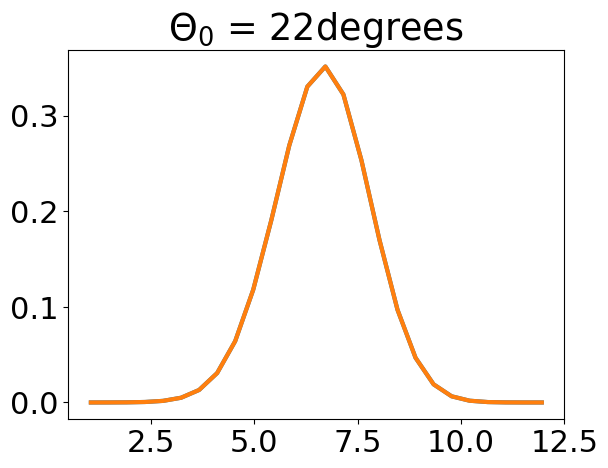

In [31]:
plt.plot(safe_value,safe_prob[0,:])
plt.plot(risky_value,risky_prob[0,:])

plt.title("$\Theta_0$ = " + str(round(theta0*90/np.pi))+ "degrees")


# kde_safe = KernelDensity(kernel="gaussian", bandwidth=0.75).fit(X = safe_value[:, np.newaxis], sample_weight = safe_prob[0,:]+1e-200)
# dens_safe = np.exp(kde_safe.score_samples(safe_value[:, np.newaxis]))



In [76]:
# How often is probability distribution 1 (risky) greater than distribution 2 (safe).

model.diff_dist(safe_value, risky_prob, safe_prob)#, model.diff_dist(safe_value, dens_risky, dens_safe[np.newaxis, :])
# model.diff_dist(safe_value, safe_prob, risky_prob)

# plt.plot(integrate.cumtrapz(risky_prob[0,:] - safe_prob[0,:], risky_value, initial=0.0))


array([[0.5]])

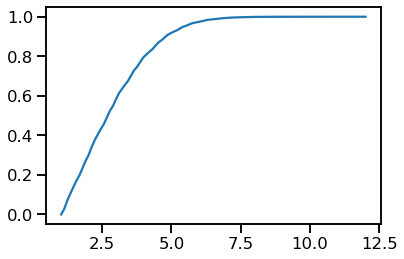

In [19]:
from scipy import integrate

p = []
cdf2 = integrate.cumtrapz(safe_prob, safe_value, initial=0.0, axis=1)

cdf2
plt.plot(safe_value, cdf2[0])
# np.shape(cdf2)

# np.shape(risky_prob)

# prob = risky_prob*cdf2
# plt.plot(safe_value, prob[0])
# # np.shape(prob)

# # p.append(prob)
# # np.shape(p)

# integrate.trapz(prob, risky_value)


In [20]:
cdf2

array([[0.        , 0.02743079, 0.06965486, 0.10496904, 0.13784823,
        0.17063855, 0.19762471, 0.2337669 , 0.26973846, 0.30001279,
        0.33986127, 0.37546976, 0.40368919, 0.43159093, 0.45613625,
        0.49016557, 0.52376988, 0.54842329, 0.5820254 , 0.61329375,
        0.63526876, 0.65667217, 0.67623425, 0.70337816, 0.72988166,
        0.74753488, 0.77162744, 0.79440186, 0.80912227, 0.82316623,
        0.83614315, 0.85377288, 0.8707502 , 0.88130545, 0.89541114,
        0.9087417 , 0.91684205, 0.92438486, 0.93131173, 0.94041976,
        0.94905765, 0.95414461, 0.9607234 , 0.96688614, 0.97044542,
        0.97367354, 0.97659427, 0.98029087, 0.9837409 , 0.98567868,
        0.98740748, 0.98895458, 0.99086576, 0.99263206, 0.99359789,
        0.99477105, 0.99584631, 0.99642406, 0.99692518, 0.99736482,
        0.99788582, 0.99835946, 0.99860746, 0.9988964 , 0.99915715,
        0.99929136, 0.99940444, 0.99950164, 0.99961206, 0.9997108 ,
        0.99976035, 0.99981568, 0.99986482, 0.99

# Linear Prior

In [5]:
## Defining the noise typez

high_stim_noise = 32
low_stim_noise = 1000
high_rep_noise = 16
low_rep_noise = 64


0.7753357326224335

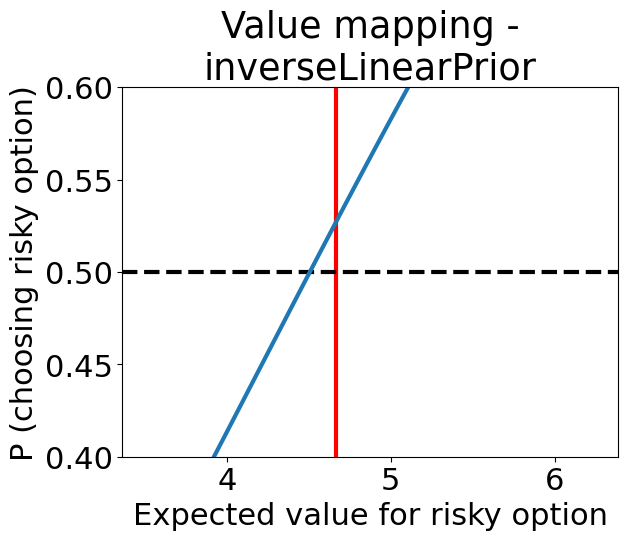

In [6]:
# Prior
# Noise regimes

# In the linear mapping condition, if safe option is displayed with high sensory noise it results in safe option being percieved 
# with low val and if risky is with hig stim noise, it is percieved with higher value - risk seekinfg behavior



# changeable parameters
high_stim_noise = 32
low_stim_noise = 1000
high_rep_noise = 32
low_rep_noise = 128

risk_prob = 0.75
type = "inverseLinearPrior"   

# Getting all the values from actual transformation
rangeOri = np.linspace(15/90., 30/90., 100)*np.pi
val_range = model.value_function_ori(rangeOri, type)
safeVal = val_range[0]
riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

# getting inferred safe values
safe_value, safe_prob = model.safe_value_dist(rangeOri[0], high_stim_noise, low_rep_noise , type, interpolation_kind = "linear", bins=25)

risky_value, risky_prob = model.risky_value_dist((rangeOri), low_stim_noise, high_rep_noise, risk_prob, type, interpolation_kind = "linear",  bins=25)

# Risk attitudes 
p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

# The value of the safe option
plt.axvline(safeVal, c='r', label = "safe option\n value")
# Where the risky option value is the same as the safe option value,
# the probability of chosing should have been 0.5 i there were no biases at all.
plt.axhline(0.5, c='k', ls='--')
plt.ylim(0.4,0.6)

# Plotting the risky option value throughout the range and comparing where it crosses the 0.5 probability mark
# and whether it is equal to the actual rational equilibrium that would have been without biases.
plt.plot(riskyVal_range, np.squeeze(p_chose_risky))#, label=['rep',kappa_r, "stim (deg)",round(kappa_s*180,2)])


# plt.legend(loc = 'lower right')

plt.xlabel("Expected value for risky option")
plt.ylabel("P (choosing risky option)")
plt.title("Value mapping -\n" + type) 

plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")

model.get_rnp(safeVal, val_range, p_chose_risky)

In [74]:
# Prior
# Noise regimes

# In the linear mapping condition, if safe option is displayed with high sensory noise it results in safe option being percieved 
# with low val and if risky is with hig stim noise, it is percieved with higher value - risk seekinfg behavior
def plot_rnp(risk_prob, type, high_stim_noise, low_stim_noise, high_rep_noise, low_rep_noise):

    # Getting all the values from actual transformation
    interval = 12
    if type == "linearPrior" or type == "prior" or type =="curvedPrior":
        safe_angles =  np.linspace(40/90., (2+interval)/90., int(32-interval))*np.pi
    if type == "inverseLinearPrior" or type == "inversePrior" or type =="inverseCurvedPrior":
        safe_angles =  np.linspace(6/90., (43-interval)/90., int(32-interval))*np.pi
    rnp = np.zeros(len(safe_angles))
    safeVals = np.zeros(len(safe_angles))
    for i in range(len(safe_angles)):
        rangeOri = np.linspace(safe_angles[i],  safe_angles[i]+(interval/90.*np.pi), interval)
        safeVal = model.value_function_ori(safe_angles[i], type)
        val_range = model.value_function_ori(rangeOri, type)
        riskyVal_range = risk_prob*model.value_function_ori(rangeOri, type)

        # getting inferred safe values
        safe_value, safe_prob = model.safe_value_dist(rangeOri[0], high_stim_noise, low_rep_noise , type, interpolation_kind = "linear", bins=25)

        risky_value, risky_prob = model.risky_value_dist((rangeOri), low_stim_noise, high_rep_noise, risk_prob, type, interpolation_kind = "linear",  bins=25)

        # Risk attitudes 
        p_chose_risky = model.diff_dist(safe_value, risky_prob, safe_prob)

        safeVals[i] = safeVal
        rnp[i] = model.get_rnp(safeVal, val_range, p_chose_risky, risk_prob)

    return safeVals, safe_angles, rnp

In [77]:
risk_prob = 0.75

# changeable parameters
type = "inverseLinearPrior" 
high_stim_noise = 32
low_stim_noise = 1000
high_rep_noise = 32
low_rep_noise = 128


safeVals, safe_angles, rnp = plot_rnp(risk_prob, type, high_stim_noise, low_stim_noise, high_rep_noise, low_rep_noise)


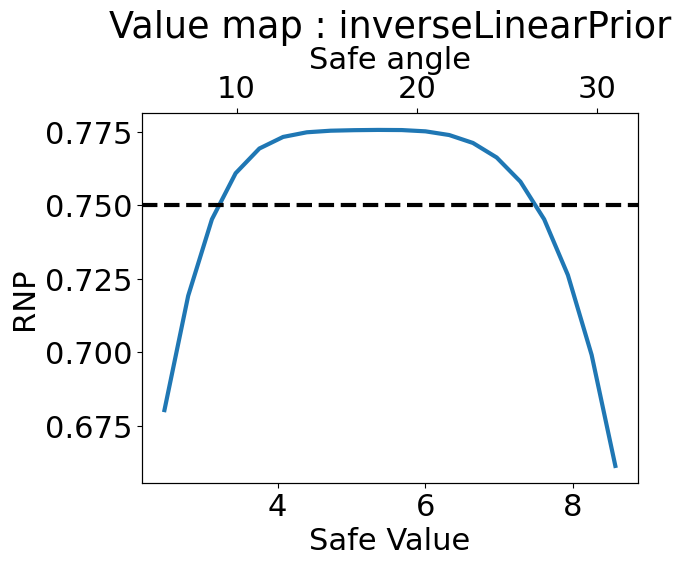

In [78]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(safeVals[:], rnp[:])
ax1.axhline(risk_prob, c='k', ls='--')

ax2.plot(safe_angles*90./np.pi, np.ones(20)/1.3, alpha=0.0)

ax2.set_xlabel("Safe angle")
ax1.set_xlabel("Safe Value")
ax1.set_ylabel("RNP")
ax1.set_title("Value map : " + type) 
plt.savefig('/Users/sbedi/Downloads/testfig.png',dpi=300, bbox_inches = "tight")